# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/CLV_Sample.csv")


In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
from sklearn.preprocessing import LabelEncoder

for col in df:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

# dummies1=pd.get_dummies(df['Coverage'])
# dummies2=pd.get_dummies(df['EmploymentStatus'])
# dummies3=pd.get_dummies(df['Vehicle Class'])

In [6]:
X = df.drop('Customer Lifetime Value',axis=1)
y = df[['Customer Lifetime Value']]

In [7]:
# X=pd.concat([dummies1,dummies2,dummies3, df[['Income','Total Claim Amount']]],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor())
])

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [11]:
# Define the hyperparameter space to search over
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (5,20,), (10,50,10,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPRegressor())]),
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(10,), (5, 20),
                                                     (10, 50, 10)]})

In [12]:
# Print the best combination of hyperparameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Best Parameters:  {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (10, 50, 10)}
Best Score: 0.26020755589170513


# 3.) Train a model with the optimal solution from GridSearch

In [13]:
# Create MLPClassifier instance with optimal parameters
mlp = MLPRegressor(activation='relu', alpha=0.001, hidden_layer_sizes=(10, 50, 10))

In [14]:
# Train the model on the training set
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 50, 10))

In [15]:
# Make predictions on the testing set
y_pred_test = mlp.predict(X_test)

In [16]:
# Make predictions on the training set
y_pred_train = mlp.predict(X_train)

# 4.) What are the in-sample and out of sample MSEs

In [17]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
print("In-sample MSE:", mse_train)

In-sample MSE: 3945584.3922356116


In [18]:
mse_test = mean_squared_error(y_test, y_pred_test)
print("Out-of-sample MSE:", mse_test)

Out-of-sample MSE: 4136405.9116734327


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [19]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [20]:
import tensorflow as tf
hidden_layer_sizes = [10, 50, 10]
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
activation = 'relu'
output = 'softmax'

In [21]:
# Build FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(hidden_layer_sizes[1], activation=activation),
    tf.keras.layers.Dense(hidden_layer_sizes[2], activation=activation),
    tf.keras.layers.Dense(1, activation=output)
])

# Compile model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
model.fit(X_train, y_train,epochs=50, batch_size=32)

Epoch 1/50
200/200 [==============================] - 2s 2ms/step - loss: 21455262.0000 - mae: 3998.6658
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 21455264.0000 - mae: 3998.6672
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 21455264.0000 - mae: 3998.6663
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 21455268.0000 - mae: 3998.6667
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 21455260.0000 - mae: 3998.6670
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 21455264.0000 - mae: 3998.6658
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 21455274.0000 - mae: 3998.6672
Epoch 8/50
200/200 [==============================] - 1s 4ms/step - loss: 21455262.0000 - mae: 3998.6692
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: 21455264.0000 - mae: 3998.6685
Epoch 10/50
200/200 [==============================] - 

In [22]:
from keras.models import load_model

# Save the model to a file
model.save('my_model.h5')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [29]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=227ff426ebec12fc962dd3927cc7a1e409a58c84af562a02d3307861c42ce01a
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


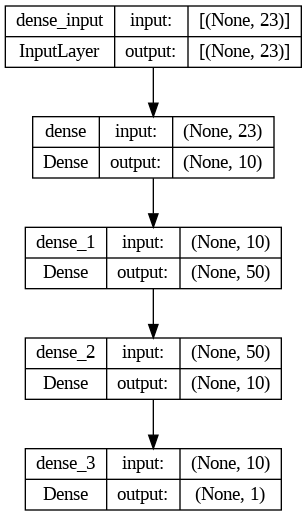

In [25]:
from keras.utils.vis_utils import plot_model


# Visualize the Keras model using plot_model()
plot_model(model, show_shapes=True, show_layer_names=True)

In [30]:
# Visualize the Keras model using ann_viz()
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Keras Model Visualization", filename='my_model.png')